Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Note that this Pre-class Work is estimated to take **25 minutes**.

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [ ]:
NAME = "MUHAMMAD ABDURREHMAN ASIF"
COLLABORATORS = ""

---

# CS110 Pre-class Work - Deterministic Quicksort

## Question 1 [time estimate: 5 minutes]

Using Figure 7.1 in Cormen et al. as a model, perform manually the partition process on the following list: A = [1,5,6,2,3,8,9,4,7]. You just need to specify the followings:
1. The array after the process is done.
2. The value of $i$ after the process is done.

First partition using 7 as pivot.
[1,5,6,2,3,8,9,4,7] i is at 1(element not index num) and j is at 4. Finding element smaller than 7 going left from j and bigger than 7 incrementing i
4 and 8 will be swapped

[1,5,6,2,3,4,9,8,7]
Now since i and j have crossed over, we will put 7 in after the swapped elements position since it j > i
[1,5,6,2,3,4,7,9,8]
Position of i is = 6

[1,5,6,2,3,4], [7], [9,8] will be sorted next


[1,3,2,4,6,5] is the next step with i = 3
[1,3,2],[4],[6,5], [7], [8,9]   8 and 9 are swapped as well

recombined after final swaps
[1,2,3,4,5,6,7,8,9]

## Question 2 [time estimate: 7 minutes]

Code up a Python implementation of `partition(A, p, r)`, closely follow the pseudo-code in Cormen et al., p.172. Your function should return the index of the pivot in the array.

In [1]:
def partition(A,p,r):
    """
    Assume r<len(A) and p>=0
    """
    x = A[r]
    i = p - 1
    
    for j in range(p,r):
        if A[j] <= x:
            i += 1
            A[i], A[j] = A[j], A[i]
        
    A[i+1], A[r] = A[r], A[i+1]
    return i + 1

In [2]:
A = [1,5,6,2,3,8,9,4,7]
assert(partition(A, 0, len(A)-1)==6)

## Question 3 [time estimate: 3 minutes]

Code up your own Python implementation of `quicksort(A, p, r)`, using `partition(A,p,r)`.

In [3]:
def quick_sort(A,p,r):
    if p<r:
        q = partition(A,p,r)
        quick_sort(A,p,q-1)
        quick_sort(A,q+1,r)
    return A


In [4]:
A = [0]
assert(quick_sort(A, 0, 0) == [0])
A = [3,1,2]
assert(quick_sort(A, 0, 2) == [1,2,3])

## Question 4 [time estimate: 10 minutes] 

Explain (using experimental plots) the running time of `quick_sort` when: 
1. all elements of array A have the same value (e.g., [1,1,1])?
2. array A contains distinct elements sorted in decreasing order (e.g., [5,4,2,1])?


In [21]:
import time
time_duplicates = []
time_reversed = []
for z in range(1,30):
    
        list_duplicates = [1 for i in range(1, z+1)] #input of duplicates sized at 100*z
        list_reversed = [i for i in range(100*z, 0, -1)]   #inputs of reversed elements sized at 100*z
        
        #time comparisons for duplicate lists
        start = time.time()
        quick_sort(list_duplicates,0,len(list_duplicates)-1)
        end = time.time()
        time_duplicates.append(end - start)
        
        
        #comparison for reversed lists
        start = time.time()
        quick_sort(list_reversed,0,len(list_reversed)-1)
        end = time.time()
        time_reversed.append(end - start)
        



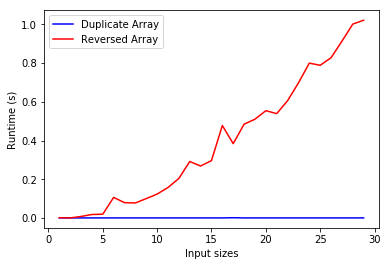

In [35]:
import matplotlib.pyplot as plt
x = list(range(1,30))
plt.plot(x,time_duplicates, color='blue', label="Duplicate Array")
plt.plot(x,time_reversed, color='red', label="Reversed Array")
plt.xlabel("Input sizes")
plt.ylabel("Runtime (s)")
plt.legend()
plt.show()


As we can see that the input has some sort of weightage on the total runtime. For reversed arrays, the runtime starts increasing significantly at every step. The way that the function works means that each step requires a pivot and then comparisons. Therefore, the time complexity for the worst case would mean O(n^2). On the other hand, the runtime for all same elements should be longer than the graph as well, since the pivot would need to change and comparisons would be required.